# Learning from data - Homework 4

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Exercise 1
For an H with dvc = 10, if you want 95% confidence that your generalization error is at most 0.05, what is the closest numerical approximation of the sample size that the VC generalization bound predicts?

In [4]:
# Manually rerun until the number converges

n = 452956.403785
d = 10
N = 3200 * math.log(81920 * math.pow(n, d) + 80)

print (N)

452956.832159


Closest to 460.000, which is alternative d).

## Exercise 2
There are a number of bounds on the generalization error ε, all holding with probability at least 1−δ. Fix dvc = 50 and δ = 0.05 and plot these bounds as a function of N. Which bound is the smallest for very large N, say N = 10,000? Note that [c] and [d] are implicit bounds in ε.

In [5]:
dvc = 50
delta = 0.05

In [6]:
#Stole this from solution to be able to avoid overflow errors with Devroye
logmH = lambda constant, N, dvc: dvc * np.log(constant * N)  # approximately log(mH) 

In [7]:
# Regular 'ol VC bound
def vc(N):
    return np.sqrt((8/N) * np.log(4*np.power(2*N, dvc)/delta))

In [8]:
# Rademacher Penalty bound
def rademacher(N):
    return np.sqrt(2*np.log(2*N*np.power(N, dvc))/N) + np.sqrt((2/N)*np.log(1/delta)) + (1/N)

In [9]:
# Parrondo and Van den Broek
# This is implicitly defined in the exercise, so I need to explicitify it
# Yes, that's a word
# ..not really
# Used closed form ax^2 + bx + c to find the explicit form, 
# assuming the generalization error will not take on negative values

def parr_vdb(N):
    return (1 + np.sqrt(N * (np.log(6 * np.power(2*N, dvc)) - np.log(delta)) + 1)) / N

In [10]:
# Devroye
# Explicit form found from a solution on course forum
# Could have used sympy or similar to optimize to the solution

#def devroye(N):
#    return (2 + np.sqrt(2 * N * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) - 4 * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) + 4) / (2 * (N - 2)))


<function matplotlib.pyplot.show>

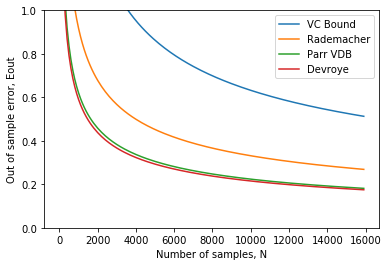

In [13]:
# Plotting the bounds

t1 = np.arange(3, 16000, 100.0)

epsilon_devroye = lambda N, dvc, delta: (2 + 
                                         np.sqrt(2 * N * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) - 
                                                     4 * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) + 
                                                        4)
                                        ) / (2 * (N - 2))

vc_line, = plt.plot(t1, vc(t1), label = 'VC Bound')
rade_line, = plt.plot(t1, rademacher(t1), label = 'Rademacher')
parr_vdb_line, = plt.plot(t1, parr_vdb(t1), label = 'Parr VDB')
devroye_line, = plt.plot(t1, epsilon_devroye(t1, dvc, delta), label = 'Devroye')

plt.ylim((0,1.0))

plt.ylabel('Out of sample error, Eout')
plt.xlabel('Number of samples, N')

plt.legend(handles=[vc_line, rade_line, parr_vdb_line, devroye_line])

plt.show

Not quite clean, as I encountered some overflow issues, and due to laziness did not want to hunt for ways to numpy to accept my functions. Devroye function stolen from http://nbviewer.jupyter.org/github/tournami/Learning-From-Data-MOOC/blob/master/Homework%204.html

Either way, the answer is **d) Devroye**

## Exercise 3
For the same values of dvc and δ of Problem 2, but for small N, say N = 5,
which bound is the smallest?

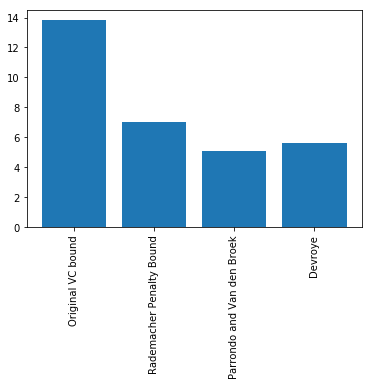

In [23]:
N = np.float(5)
epsilons = [vc(N), 
            rademacher(N),
            parr_vdb(N),
            epsilon_devroye(N, dvc, delta)] #Again using the stolen function

bounds = ("Original VC bound", 
          "Rademacher Penalty Bound", 
          "Parrondo and Van den Broek", 
          "Devroye")

#plt.title("$\epsilon$ at $N=5$")
#plt.ylabel("$\epsilon$")

plt.xticks([0, 1, 2, 3], bounds, rotation='vertical')

plt.bar(np.arange(4), epsilons)
plt.show()

We see that **c) Parrondo and Van den Broek** has the lowest generalization error with a low N.

# Bias and Variance
Consider the case where the target function f : [−1, 1] → R is given by f (x) = sin(πx) and the input probability distribution is uniform on [−1, 1]. Assume that the training set has only two examples (picked independently), and that the learning algorithm produces the hypothesis that minimizes the mean squared error on the examples.

## Exercise 4
Assume the learning model consists of all hypotheses of the form h(x) = ax. What is the expected value, g ̄(x), of the hypothesis produced by the learning algorithm (expected value with respect to the data set)? Express your g ̄(x) as aˆx, and round aˆ to two decimal digits only, then match exactly to one of the following answers.

In [16]:
def get_a_hat_list(K = 100000):
    """Returns a list of a_hats based on the
       number of random samples K
       
       Args: 
           K: number of random samples
       Returns:
           a_hat_list: an array all the a_hats
    """
    a_hat_list = np.zeros(K)
    
    x1 = np.random.uniform(-1, 1, K) # random 1st point for K trials
    y1 = np.sin(np.pi * x1) # y values corresponding to the x1 values
    x2 = np.random.uniform(-1, 1, K) # random 2nd point for K trials
    y2 = np.sin(np.pi * x2) # y values corresponding to the x2 values

    a_hat_list = (x1 * y1 + x2 * y2) / (x1 ** 2 + x2 ** 2) # K a_hats
    
    return a_hat_list

a_hat_list = get_a_hat_list() # save for a_bar, g_bar, bias and variance in later problems
a_bar = np.mean(a_hat_list)

print("g_bar(x) = {}x".format(round(a_bar, 2)))

g_bar(x) = 1.43x


The answer is given as 1.43, meaning the solution is **e) None of the above**.

## Exercise 5
What is the closest value to the bias in this case?

We have that the expected difference between ..

In [18]:
x_range = np.linspace(-1, 1, 1000)
bias = np.mean((1.43 * x_range - np.sin(np.pi * x_range))**2)
print("bias = {}".format(np.round(bias, 2)))

bias = 0.27


The closest answer is **b) 0.3**

## Exercise 6

What is the closest value to the variance in this case?

In [20]:
variance = np.mean((np.outer(a_hat_list, x_range) - a_bar * x_range)**2)
print("variance = {}".format(round(variance, 2)))

variance = 0.24


The closest answer is **a) 0.2**